# 그래프 그리기

### [Matplotlib의 기본적인 사용 방법](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

파이썬에서 그래프를 그릴때 가장 흔하게 사용되는 Matplotlib의 기본적인 사용 방법을 알아보겠습니다. 설치는 ```pip install matplotlib```로 간단히 할 수 있습니다.

MatplotLib을 사용할 때는 두 가지 스타일 중 하나를 선택할 수 있습니다. 

1. PyPlot 스타일: 모든 것을 다 plt를 통해서 합니다. 아주 간단한 그래프를 빠르게 그려볼 때 사용할 수 있습니다.

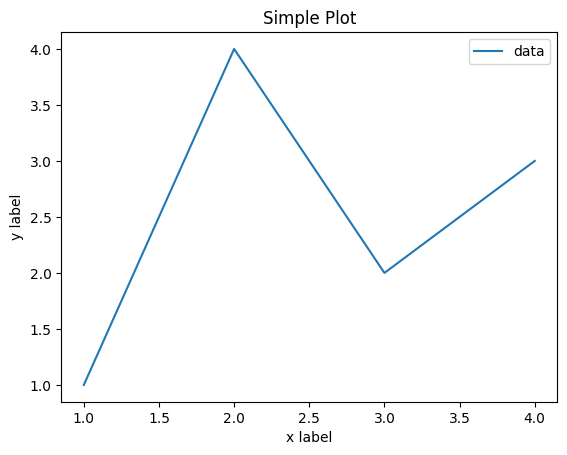

In [1]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 4, 2, 3]

plt.figure()
plt.plot(x, y, label="data")
plt.xlabel("x label")
plt.ylabel("y label")
plt.title("Simple Plot")
plt.legend()
plt.show()

2. OO(Object-Oriented) 스타일: figure와 axes의 객체를 만들고 메써드를 호출해서 어떻게 그려질 지를 조절

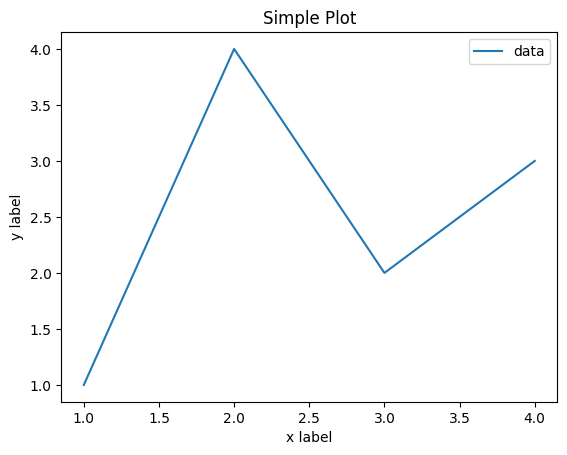

In [2]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [1, 4, 2, 3]

fig, ax = plt.subplots()
ax.plot(x, y, label="data")
ax.set_xlabel("x label")
ax.set_ylabel("y label")
ax.set_title("Simple Plot")
ax.legend()

plt.show()  # 스크립트 모드에서는 필수

대부분의 경우 자동으로 보기 좋은 설정을 만들어줍니다. 그러나 논문 같은 전문 출판물에 넣을 그래프를 그릴 때는 데이터의 특징에 맞도록 세세하게 조절을 해줘야겠지요. 공식 문서의 [Parts of a Figure](https://matplotlib.org/stable/tutorials/introductory/usage.html#parts-of-a-figure)는 그래프 안에서 어떤 것들을 조절할 수 있는지 보여줍니다. 예시) [Spines](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Patch.html#matplotlib.patches.Patch.set_linestyle), [grid](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html), [ticks](https://predictablynoisy.com/matplotlib/gallery/ticks_and_spines/major_minor_demo.html), 등

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y1 = [1, 3.8, 2, 2.5]
y2 = [1, 2, 3, 4]

fig, ax = plt.subplots()

ax.plot(x, y1, label="data1")
ax.plot(x, y2, label="data2")

ax.set_xlabel("x label")
ax.set_ylabel("y label")

ax.set_title("Simple Plot")

ax.legend()

ax.grid(color="red", alpha=0.2)  # ax.grid()

ax.spines["right"].set_color("blue")
ax.spines["right"].set_linestyle("-.")

# Major/minor ticks
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_formatter(FormatStrFormatter("%1.1f"))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

plt.show()  # 스크립트 모드에서는 필수, jupyter 에서는 이 함수를 호출 안해줘도 그려짐.

한 Figure 안에 여러개의 그래프(subplot)을 그릴 수 있습니다.

In [ ]:
import matplotlib.pyplot as plt

data = {"apple": 10, "orange": 15, "lemon": 5, "lime": 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(9, 5), sharey=True)

axs[0, 0].bar(names, values, color=['black', 'red', 'green', 'blue', 'cyan'])
axs[0, 1].scatter(names, values)
axs[0, 2].plot(names, values)
fig.suptitle("Categorical Plotting")

plt.show()

Subplot들을 더 자유롭게 배치할 수도 있습니다.

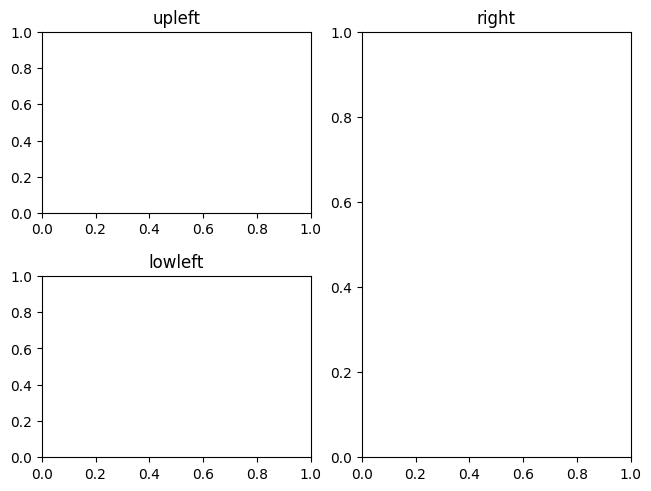

In [3]:
import matplotlib.pyplot as plt

fig, axd = plt.subplot_mosaic(
    [["upleft", "right"], ["lowleft", "right"]],  #그래프를 보면 오른쪽 영역에는 그래프 하나만 그리기 위해서, 각 배열 두번째 index에 "right"를 모두 집어넣어 주었다.
    layout="constrained",
    #constrained_layout=True # 3.4 이하
)

axd["upleft"].set_title("upleft")
axd["lowleft"].set_title("lowleft")
axd["right"].set_title("right")

# axd["upleft"].scatter(names, values)
# axd["lowleft"].plot(names, values)
# axd["right"].bar(names, values)

plt.show()

[파이 차트](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py)도 간단히 그릴 수 있습니다.

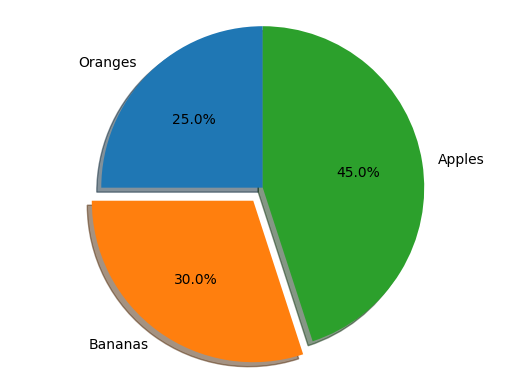

In [4]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ["Oranges", "Bananas", "Apples"]
sizes = [25, 30, 45]
explode = (0, 0.1, 0) 

fig, ax = plt.subplots()
ax.pie(
    sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90
)
ax.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

그 외의 다양한 그래프들은 [갤러리](https://matplotlib.org/stable/gallery/index.html)를 참고하세요.

##### [실습] CSV 파일에서 읽어온 데이터 그려보기

[비트코인 가격 데이터](https://finance.yahoo.com/quote/BTC-USD/history?period1=1410825600&period2=1645142400&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true)를 빈도(Frequency)는 월별(Monthly), 기간(Time Period)은 최대(Max)로 적용(Apply) 후 다운로드(Download) 합니다.
- 첫 줄은 그래프 그릴 때 사용하지 않습니다.
- 날짜(Date)에서 2014-01와 같이 일(day)를 삭제해서 길이를 줄였습니다.
- 수치 데이터는 읽어들인 후 자료형을 바꿔줘야 그릴 수 있습니다.
- ```MultipleLocator(20)```를 사용했습니다.

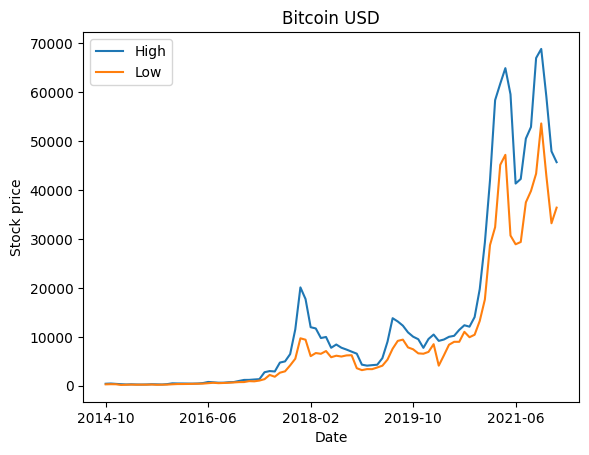

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

#데이터 읽어오기
dates = []
highs = []
lows = [] 

with open("BTC-USD.csv") as f:
    while line := f.readline():
        splitted = line.split(",")
        dates.append(splitted[0])
        highs.append(splitted[2])
        lows.append(splitted[3])

#첫번째 아이템들을 그래프 그릴때 필요없기 때문에 삭제
del dates[0] 
del highs[0]
del lows[0]

#자료 정리
dates = list(map(lambda x:x[:-3], dates))
highs = list(map(float, highs))
lows = list(map(float, lows))

#그래프 그리기
fig, ax = plt.subplots()
ax.plot(dates, highs, label="High")
ax.plot(dates, lows, label="Low")
ax.set_xlabel("Date")
ax.set_ylabel("Stock price")
ax.set_title("Bitcoin USD")
ax.legend()
ax.xaxis.set_major_locator(MultipleLocator(20))

csv 모듈을 이용해서 더 간단하게 구현해보자.

{'Date': '2014-10-01', 'Open': '387.427002', 'High': '411.697998', 'Low': '289.295990', 'Close': '338.321014', 'Adj Close': '338.321014', 'Volume': '902994450'}


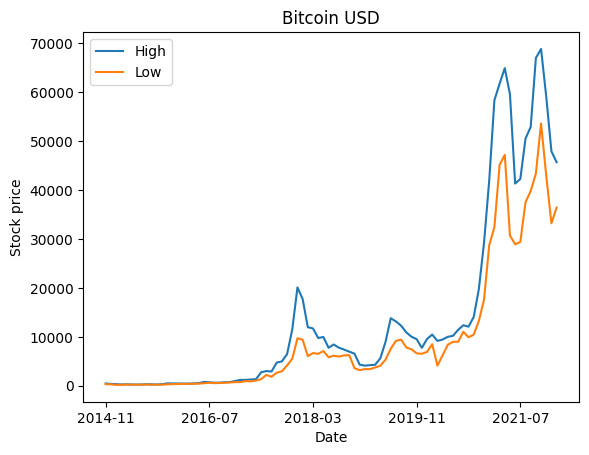

In [5]:
import csv 

dates = []
highs = []
lows = []

with open('BTC-USD.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',') # 각각의 줄들을 Dictionary로 만들어주기 때문에 훨씬 편하게 사용가능

    #한 줄만 출력홰보기 
    for row in csv_reader:
        print(row)
        break

    for row in csv_reader:
        dates.append(row["Date"])
        highs.append(row["High"])
        lows.append(row["Low"])

#자료 정리 
dates = list(map(lambda x:x[:-3], dates))
highs = list(map(float, highs))
lows = list(map(float, lows))

#그래프 그리기
fig, ax = plt.subplots()
ax.plot(dates, highs, label="High")
ax.plot(dates, lows, label="Low")
ax.set_xlabel("Date")
ax.set_ylabel("Stock price")
ax.set_title("Bitcoin USD")
ax.legend()
ax.xaxis.set_major_locator(MultipleLocator(20))

##### [실습] 몬테 카를로 시뮬레이션으로 원주율 구하기

난수를 이용해서 원주율의 근사값을 계산해봅시다.

**스텝1** ```random.uniform()```을 이용해서 그림과 같은 범위의 상자를 채우는 2차원 산포도(scatter plot)를 그려봅시다. 이때 중심이 원점에 있고 반지름이 1.0인 원 안에 들어가는 점들은 빨간색으로 그렇지 않은 점들은 파란색으로 그려봅시다. 어떤 점의 좌표가 $(x, y)$라고 할 때 $x^2 + y^2 <= 1.0$을 만족하면 원 안에 들어간 것입니다. 점의 개수는 변수 ```num_points```를 이용하여 바꿀 수 있게 합시다.

**스텝2** 4.0 x (원 안에 들어간 점들의 개수)/```num_points```가 원주율의 근사치입니다.

num_points를 키울 수록 실제 원주율 3.141592에 가까워집니다.

**힌트** 예를 들어서 (1, 3), (5, 2) 같은 두 개의 점을 ```ax.scatter()```로 그릴 때는 ```ax.scatter([1, 5], [3, 2])``` 와 같이 x좌표는 x좌표끼리 모으고 y좌표는 y좌표끼리 모아야 점을 찍으실 수 있습니다.

In [ ]:
import random
import matplotlib.pyplot as plt

random.seed(0) # 결과 비교를 위해 시드 고정

num_points = 100000

# 3.12884

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Monte Carlo Pi")

plt.show()

### [Seaborn](https://seaborn.pydata.org/) 소개

Seaborn은 Matplotlib을 적은 코드로 더 보기 좋게 사용할 수 있도록 도와줍니다. 

```pip install seaborn```

In [ ]:
import seaborn as sns

sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

##### [Bokeh](https://bokeh.org/) 소개

그래프와 상호작용을 할 수 있습니다. 웹브라우저가 기본이며 [주피터 노트북용 예제](https://docs.bokeh.org/en/2.4.0/docs/gallery.html#notebook-examples)는 여기를 참고하세요.


##### [Folium](https://python-visualization.github.io/folium/) 소개

지도 위에 정보를 표시할 때 사용합니다. 위도와 경도는 구글맵에서 찾을 수 있습니다.

```pip install folium```

In [ ]:
import folium

f = folium.Figure(width=500, height=500)
m = folium.Map(location=[37.5453957, 126.9650642], zoom_start=8).add_to(f)
folium.Circle(
    radius = 10000,
    location = [37.5453957, 126.9650642],
    popup="Hello",
    color="crimson",
    fill=True
).add_to(m)
f